# Introduction
This notebook purpose is to plot everything needed for the thesis

### Get source folder and append to sys directory

In [2]:
from __future__ import print_function
import os
import sys
PROJ_ROOT = os.path.join(os.pardir)
print(os.path.abspath(PROJ_ROOT))
src_dir = os.path.join(PROJ_ROOT, "src")
sys.path.append(src_dir)
# Data path example
#pump_data_path = os.path.join(PROJ_ROOT,
#                              "data",
#                              "raw",
#                              "pumps_train_values.csv")

/mnt/4ba37af6-51fd-47bc-8321-8c500c229114/study/School/KHOA LUAN TOT NGHIEP/runnable_program


### Imports
Import libraries and write settings here.

In [3]:
# Data manipulation
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30
# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython import get_ipython
ipython = get_ipython()
# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload
%autoreload 1
# Use %aimport module to reload each module

# Visualizations
import matplotlib.pyplot as plt

# Analysis/Modeling
Do work here

What we need right now is:
- Total system processes
- Data preparation processes
- Raw data description table
- Enhanced data table
- Result for each time steps table
- result of each hour model table
- model creation diagram
- model training process
- model deployment process
- Web app architecture

- Raw data line plot overview
- Missing data spot overview (2 spots)
- Dickey fuller test
- KDE plot or line plot for distribution of air level
- Plot seasonal decompose
- Plot PACF for most affect time
- Plot real data vs result for 5 hours
- Plot bar chart for the result of 12 models for each time window
- Plot bar chart for the result of each hour model (RMSE and MAE)

In [4]:
save_path = PROJ_ROOT + "/reports/figures/"
save_path

'../reports/figures/'

In [5]:
from data import read_data

df = read_data.read_data_by_type(PROJ_ROOT=PROJ_ROOT, data_type="interim", output_type="dataframe")
df = df[df.index.get_level_values(0) == 49]

In [16]:
from features import extract_features

data = extract_features.add_features(df_copy)

In [18]:
data.columns

Index(['AQI_h', 'AQI_h_I', 'Continous length', 'cat_2.0', 'cat_3.0', 'cat_4.0',
       'cat_5.0', 'cat_6.0', 'sin_hour', 'cos_hour', 'sin_month', 'cos_month',
       'sin_dayweek', 'cos_dayweek', 'sin_daymonth', 'cos_daymonth',
       'year_2017', 'year_2018', 'year_2019', 'year_2020', 'year_2021',
       'weekend', 'holidays', 'AQI_h_mean_lag1', 'AQI_h_mean_lag2',
       'AQI_h_mean_lag3', 'AQI_h_mean_lag4', 'AQI_h_mean_lag5',
       'AQI_h_mean_lag6', 'AQI_h_mean_lag7', 'AQI_h_mean_lag8',
       'AQI_h_mean_lag9', 'AQI_h_mean_lag10', 'AQI_h_mean_lag11',
       'AQI_h_mean_lag12', 'AQI_h_mean_lag24'],
      dtype='object')

In [6]:
df_copy = df.copy()
df_copy.reset_index(inplace=True)
df_copy = df_copy.set_index('time').asfreq('H')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'AQI')

Text(0.5, 1.0, 'Ho Chi Minh cleaned data')

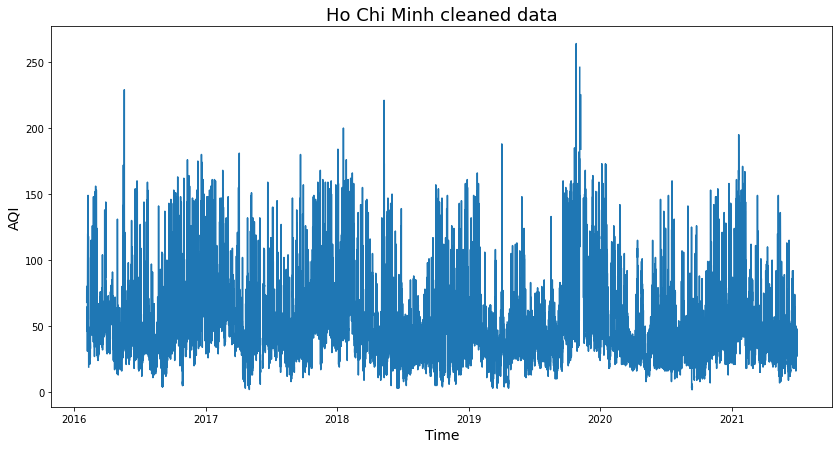

In [7]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot()
ax.plot(df_copy.index, df_copy['PM25'].values)
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("AQI", fontsize=14)
ax.set_title("Ho Chi Minh cleaned data", fontsize=18)
fig.savefig(save_path + 'HCM_AQI_calculated_data.png')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'AQI')

Text(0.5, 1.0, 'Ho Chi Minh missing data')

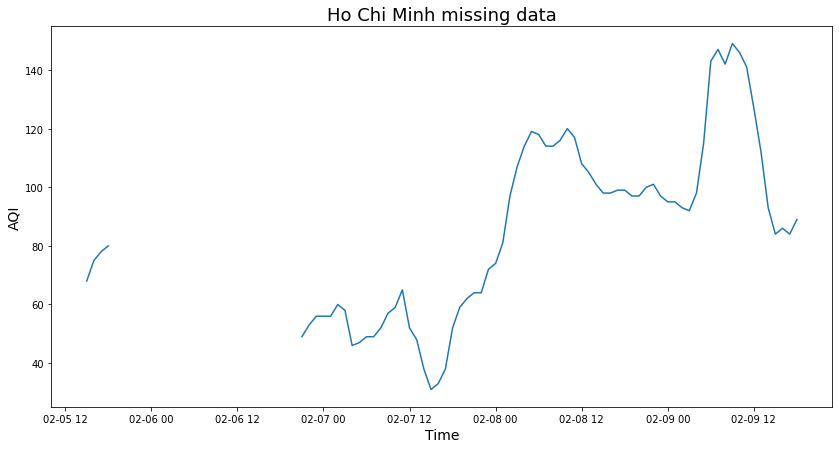

In [8]:
plot_data = df_copy.head(100)
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot()
ax.plot(plot_data.index, plot_data['PM25'].values)
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("AQI", fontsize=14)
ax.set_title("Ho Chi Minh missing data", fontsize=18)
fig.savefig(save_path + 'HCM_AQI_missing_data_1.png')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'AQI')

Text(0.5, 1.0, 'Ho Chi Minh missing data')

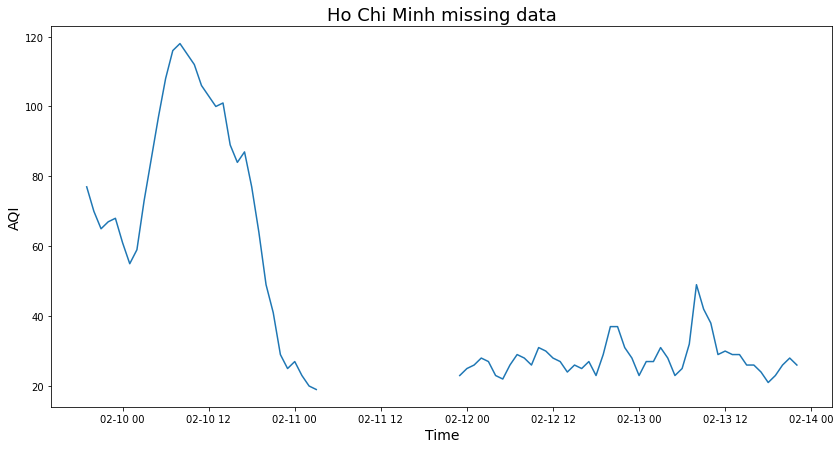

In [9]:
plot_data = df_copy.iloc[100:200]
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot()
ax.plot(plot_data.index, plot_data['PM25'].values)
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("AQI", fontsize=14)
ax.set_title("Ho Chi Minh missing data 2", fontsize=18)
fig.savefig(save_path + 'HCM_AQI_missing_data_2.png')

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [47]:
def plotseasonal(res, axes):
    axes[0].plot(result.observed)
    axes[0].set_ylabel('Observed')
    axes[1].plot(result.trend)
    axes[1].set_ylabel('Trend')
    axes[2].plot(result.seasonal)
    axes[2].set_ylabel('Seasonal')
    axes[3].plot(result.resid)
    axes[3].set_ylabel('Residual')

Text(0.5, 0.98, 'Seasonal decomposed')

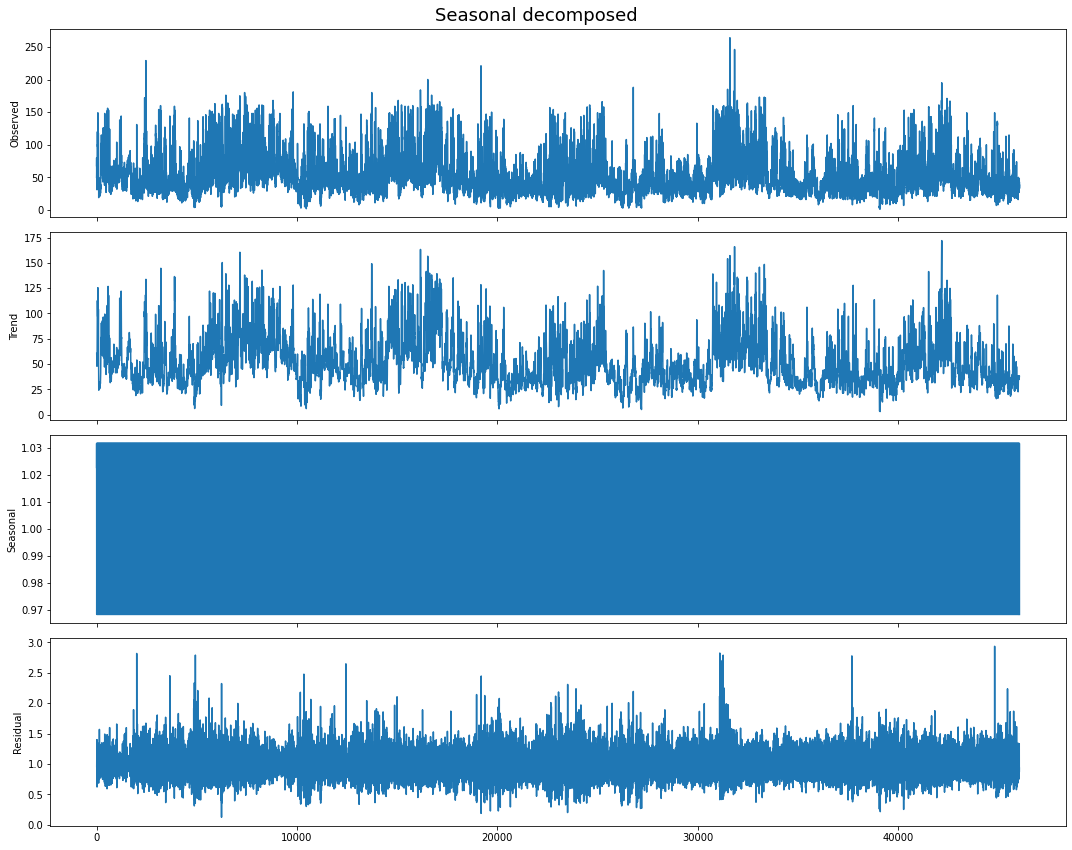

In [60]:
df_copy = df.copy()
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(15,12))
series = df_copy['PM25'].values
result = seasonal_decompose(series, model='multiplicative', period=12)
plotseasonal(result, axes)
fig.suptitle("Seasonal decomposed", fontsize=18)
fig.savefig("seasonal decomposed.png")
plt.tight_layout()
plt.show()

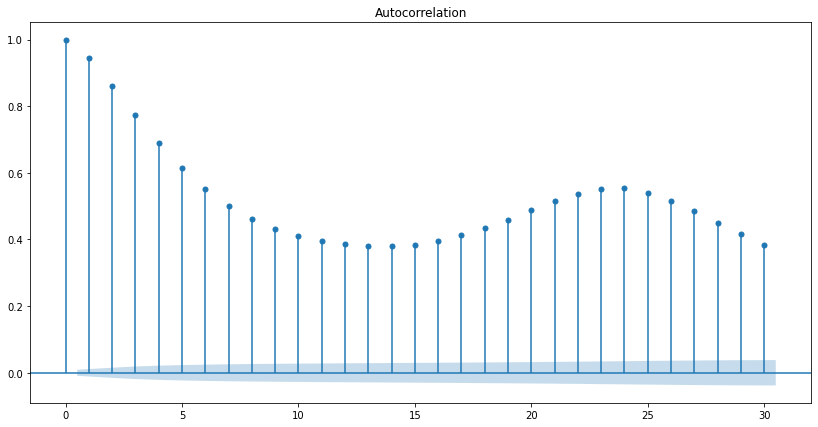

Text(0.5, 1.0, 'Autocorrelation')

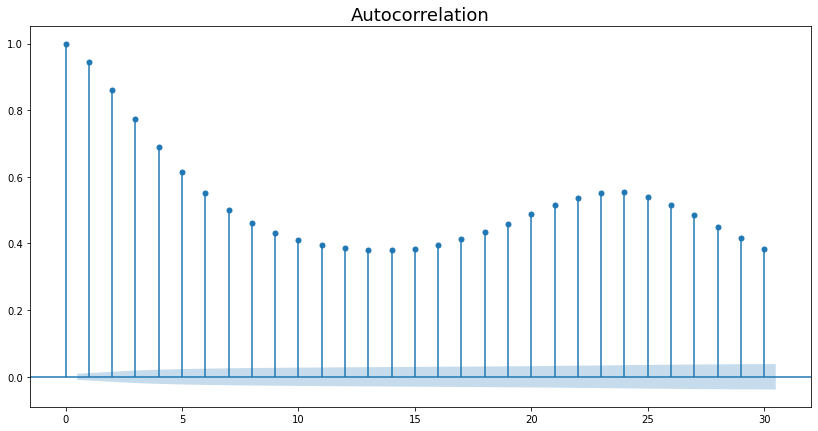

In [71]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot()
plot_acf(series, lags=30, alpha=0.05, ax=ax)
ax.set_title("Autocorrelation", fontsize=18)
fig.savefig("Auto correlation.png")

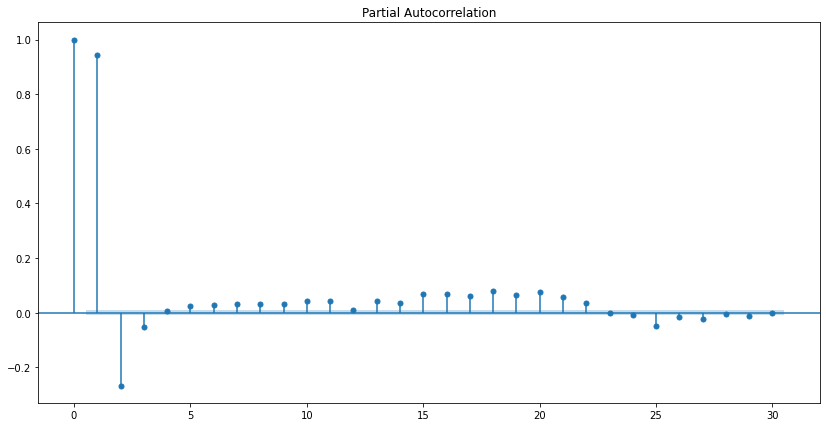

Text(0.5, 1.0, 'Partial Autocorrelation')

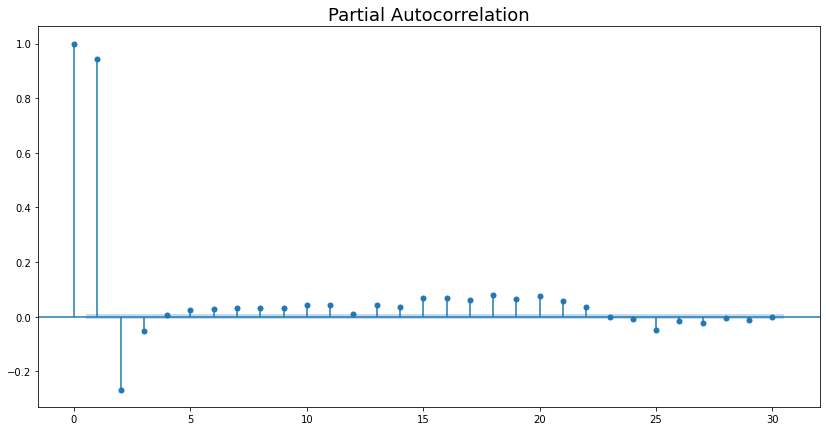

In [72]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot()
plot_pacf(series, lags=30, alpha=0.05, ax=ax)
ax.set_title("Partial Autocorrelation", fontsize=18)
fig.savefig("Partial Autocorrelation.png")

In [15]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)
    
    if dfoutput[1] > 0.05:
        print('Series is not Stationary')
    else:
        print('Series is Stationary')
adf_test(series)

Results of Dickey-Fuller Test:
Test Statistic                -1.410814e+01
p-value                        2.547810e-26
#Lags Used                     5.600000e+01
Number of Observations Used    4.599400e+04
Critical Value (1%)           -3.430492e+00
Critical Value (5%)           -2.861603e+00
Critical Value (10%)          -2.566803e+00
dtype: float64
Series is Stationary


In [22]:
import holidays
time_index = df_copy.index.get_level_values(1)
df_copy['Day of Week'] = time_index.dayofweek.astype(float)
vn_holidays = np.array(
        list(holidays.VN(years=[2015, 2016, 2017, 2018, 2019, 2020, 2021]).keys()))
holiday_mask = np.isin(time_index.date, vn_holidays)
weekend_masks = (df_copy['Day of Week'].values == 5) | (
    df_copy['Day of Week'].values == 6)
df_copy['weekend'] = np.where(weekend_masks == True, 1, 0)
df_copy['holidays'] = np.where(holiday_mask == True, 1, 0)

site_id  time               
49       2016-02-05 15:00:00    0
         2016-02-05 16:00:00    0
         2016-02-05 17:00:00    0
         2016-02-05 18:00:00    0
         2016-02-06 21:00:00    1
                               ..
         2021-06-30 20:00:00    0
         2021-06-30 21:00:00    0
         2021-06-30 22:00:00    0
         2021-06-30 23:00:00    0
         2021-07-01 00:00:00    0
Name: weekend, Length: 46051, dtype: int64

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here